In [12]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
def plot_confusion_matrix(X, y, model):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()

    plt.show()

In [14]:
#Variable para la ruta de los archivos con la data
ruta = "" #Colocar la ruta donde esta ubicado el archivo con la data para el ejercicio

#Cargar la data de entrenamiento a un dataframe
dfTrain = pd.read_csv(ruta + "fashion-mnist_train.csv")

dfTrain

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# separate the training data into images and labels
imagenes = dfTrain.iloc[:, 1:]
categorias = dfTrain.iloc[:, 0]

In [16]:
categorias.value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

<AxesSubplot: >

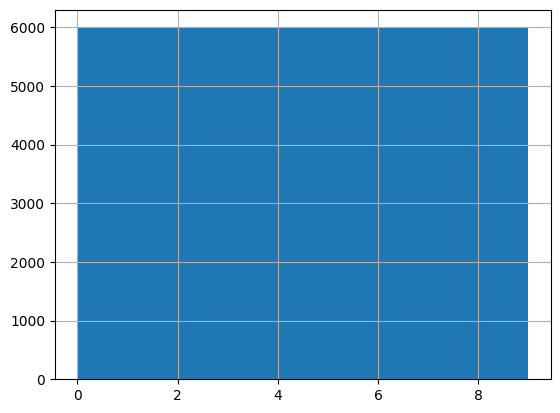

In [17]:
categorias.hist()

<AxesSubplot: >

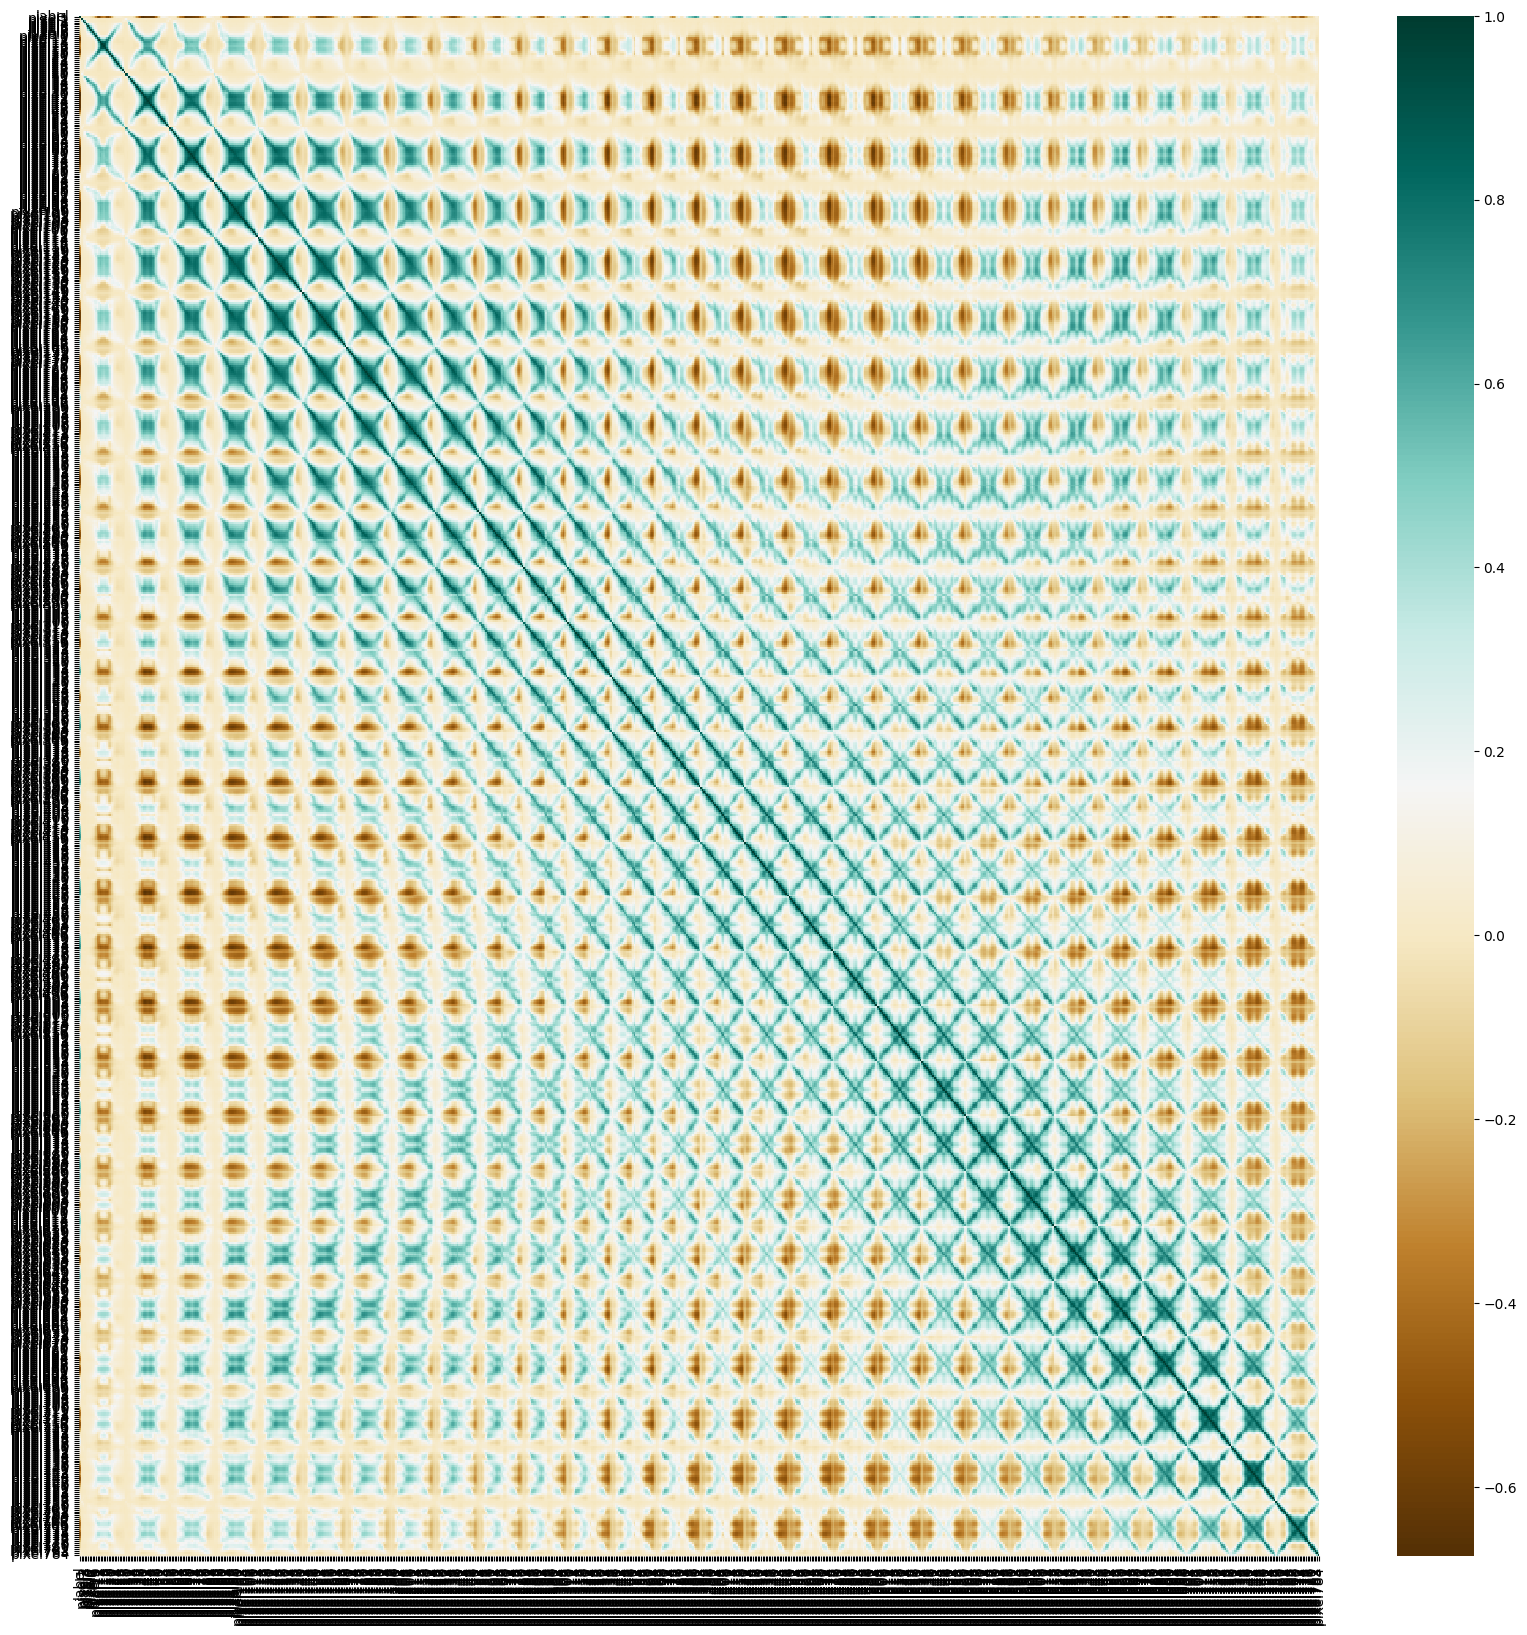

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Calcular la matriz de correlación
corr = dfTrain.corr()

# plot
plt.figure(figsize=(20, 20))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='BrBG')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(imagenes, categorias, stratify=categorias, test_size=0.3, random_state=42)

In [24]:
# Método para genera la matriz de confusion
def evaluate_model(X_train, y_train, X_test, y_test, model):
    print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
    print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
    print("")
    print("")
    print("")


    print("Training confusion matrix")
    plot_confusion_matrix(X_train, y_train, model)
    print("Test confusion matrix")
    plot_confusion_matrix(X_test, y_test, model)

Error training: 10.433333333333328 %
Error test: 14.73888888888889 %



Training confusion matrix


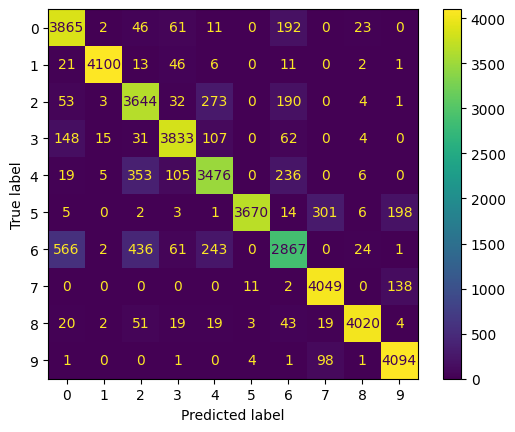

Test confusion matrix


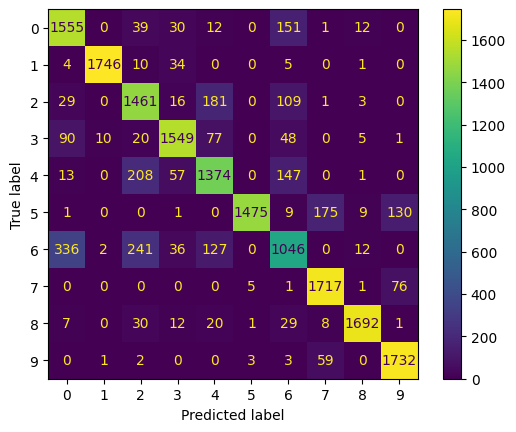

In [25]:
# KNN

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

Error training: 15.269047619047615 %
Error test: 16.572222222222223 %



Training confusion matrix


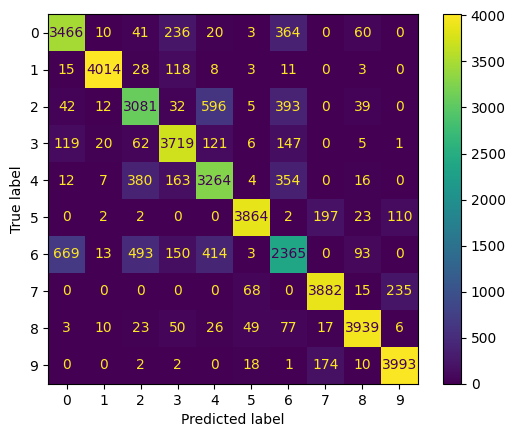

Test confusion matrix


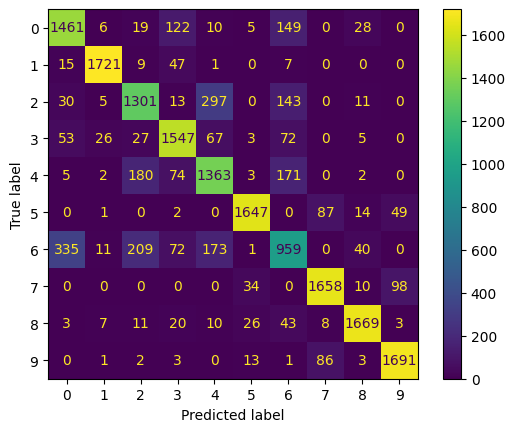

In [26]:
# Boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
    max_depth=1, random_state=0)

model = model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

Error training: 11.128571428571432 %
Error test: 14.633333333333331 %



Training confusion matrix


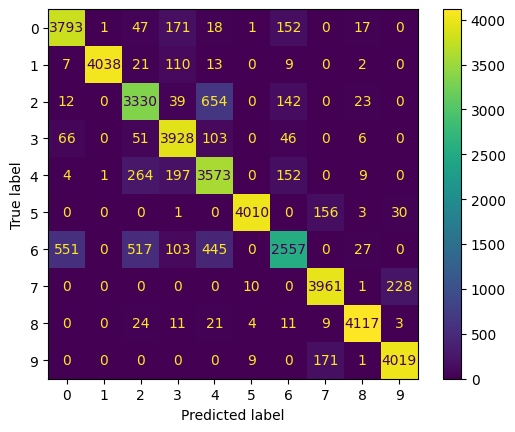

Test confusion matrix


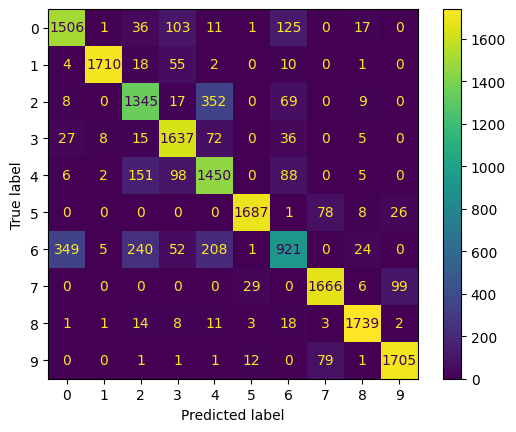

In [27]:
# Modelo RandomForestClassifier
model = RandomForestClassifier(max_depth=10)

model = model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)